In [2]:
%pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/1a/b4ab4b8f8b3a41fade4899fd00b5b2d2dad0981f3e1bb10df4c522975fd7/tensorflow-2.15.0.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.5 MB/s eta 0:00:00
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/ea/df/55525e489c43f9dbb6c8ea27d8a567b3dcd18a22f3c45483055f5ca6611d/libclang-16.0.6-py2.py3-none-manylinux2010_x86_64.whl.metadata
  Obtai

  Obtaining dependency information for cachetools<6.0,>=2.0.0 from https://files.pythonhosted.org/packages/a2/91/2d843adb9fbd911e0da45fbf6f18ca89d07a087c3daa23e955584f90ebf4/cachetools-5.3.2-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 12.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 12.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 13.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━

2023-12-19 10:37:31.414302: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-19 10:37:31.505886: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 10:37:31.505913: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 10:37:31.510647: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 10:37:31.547574: I tensorflow/core/platform/cpu_feature_guar

Tensorflow version: 2.15.0 

x_train: (60000, 28, 28, 1)
y_train: (60000,)
x_test: (10000, 28, 28, 1)
y_test: (10000,)


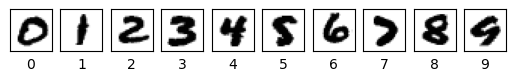

In [1]:
from IPython.display import display, clear_output
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

import tensorflow as tf
print('Tensorflow version:', tf.__version__, '\n')

# Loading the MNIST dataset in one line
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train_normalized = x_train/255
x_test_normalized = x_test/255

# in the next step, we also need to reshape our input to fit our input layer later on.
# This is due to keras expecting a definition for how many channels your input sample has, as we
# deal with gray scale this is 1.
x_train= x_train_normalized.reshape(-1, 28, 28, 1)
x_test = x_test_normalized.reshape(-1, 28, 28, 1)

# Printing the shape
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)


# train_best_index = [47647, 17775, 42830, 13519, 1273, 26066, 21901, 10297, 46338, 39293]

# x_train_b = []
# y_train_b = []

# for i in range(10):
                
#     plt.subplot(1, 10, i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(x_train[train_best_index[i]], cmap=plt.cm.binary)
#     plt.xlabel(y_train[train_best_index[i]])

#     x_train_b.append(x_train[train_best_index[i]])
#     y_train_b.append(y_train[train_best_index[i]])
    
# # Umwandeln der Listen in numpy arrays
# x_train_b = np.array(x_train_b).repeat(10000)
# x_train_b = x_train_b.reshape(-1, 28, 28, 1)

# y_train_b = np.array(y_train_b).repeat(10000)

# plt.show()


In [ ]:
nets = 20
model = [0] * nets

for j in range(nets):

    model[j] = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28,28,1)),

    tf.keras.layers.Conv2D(filters=28, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=28, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=28, kernel_size=5, strides=2, padding='same', activation='relu', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.GaussianNoise(0.75),

    tf.keras.layers.Conv2D(filters=56, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=56, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=56, kernel_size=5, strides=2, padding='same', activation='relu', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.GaussianNoise(0.75),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(82, kernel_regularizer = tf.keras.regularizers.l2(0.07), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.GaussianNoise(0.75),

    tf.keras.layers.Dense(54, kernel_regularizer = tf.keras.regularizers.l2(0.07), activation = 'sigmoid'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.GaussianNoise(0.75),

    tf.keras.layers.Dense(10, activation='softmax', use_bias=False)
    ])

    # Define your loss
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    # print(-tf.math.log(1/10))
    sampleID = 100
    loss_fn(y_train[:1], model[j](x_train[sampleID-1:sampleID]).numpy()).numpy()

    model[j].compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss= loss_fn,
                    metrics=['accuracy'])

vlr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.975 ** x)

er = tf.keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=10,
        restore_best_weights=True
)

accuracies = []

for j in range(nets):
    
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                rotation_range=15,
                zoom_range = 0.15,
                shear_range=0.1,
                width_shift_range=0.1,
                height_shift_range=0.1,
                rescale=0,
                fill_mode = 'nearest',
                horizontal_flip=False,
                vertical_flip=False)
    datagen.fit(x_train)

    history = model[j].fit(
        datagen.flow(x_train, y_train, batch_size = 32),
        epochs=500,
        shuffle = True,
        validation_data=(x_test, y_test),
        callbacks=[vlr, er],
        verbose=1
    )

    (test_loss, test_acc) = model[j].evaluate(x_test, y_test)
    print("Loss: ", test_loss)
    print("Accuracy: ", test_acc)
    accuracies.append(test_acc)
    model_name = f'tmp/model.{j:d}.{test_acc:.4f}.h5'
    model[j].save(model_name, save_format='h5')

# Plotte die Genauigkeiten als Histogramm
plt.figure(figsize=(8, 6))
plt.hist(accuracies, bins=10, edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Histogram of Model Accuracies')
plt.grid(True)
plt.show()

mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Standard Deviation of Accuracy: {std_accuracy:.4f}')

In [ ]:
accuracies = [0.9950000047683716,
              0.9973999857902527,
             0.9966999888420105,
             0.9962000250816345,
             0.9961000084877014,
             0.996999979019165,
             0.9965000152587891,
             0.9969000220298767,
             0.9959999918937683,
             0.9969000220298767,
             0.9962999820709229,
             0.9952999949455261,
             0.9965000152587891,
             0.9961000084877014,
             0.9958999752998352,
             0.9961000084877014,
             0.9966999888420105,
             0.996399998664856,
             0.9966999888420105,
             0.9952999949455261,
             0.9968000054359436,
             0.9965999722480774,
             0.9952999949455261]


print(accuracies)



# Plotte die Genauigkeiten als Histogramm
plt.figure(figsize=(8, 6))
plt.hist(accuracies, bins=10, edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Histogram of Model Accuracies')
plt.grid(True)
plt.show()

mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Standard Deviation of Accuracy: {std_accuracy:.4f}')